In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyecharts.charts import Liquid
from pyecharts import options as opts

In [2]:
usedcars = pd.read_csv("UserCarData.csv")

In [3]:
usedcars.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y


In [4]:
usedcarsval = usedcars[['year','selling_price','km_driven','mileage','engine','max_power','seats']]

In [5]:
usedcars.dtypes

Sales_ID               int64
name                  object
year                   int64
selling_price          int64
km_driven              int64
Region                object
State or Province     object
City                  object
fuel                  object
seller_type           object
transmission          object
owner                 object
mileage              float64
engine                 int64
max_power            float64
torque                object
seats                  int64
sold                  object
dtype: object

<AxesSubplot:title={'center':'Bar Chart'}, xlabel='Type of sellers', ylabel='Amount'>

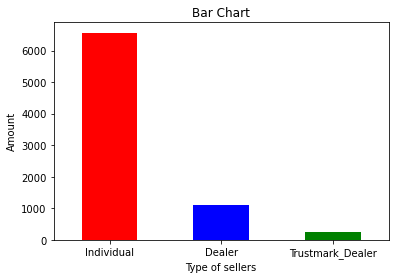

In [6]:
usedcars["seller_type"].value_counts().plot(kind = 'bar',xlabel='Type of sellers', ylabel='Amount', rot=0,color = ["r","b","g"],title = "Bar Chart")

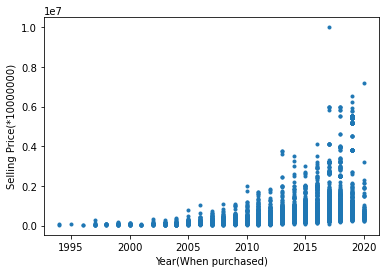

In [7]:
plt.scatter(usedcars["year"],usedcars["selling_price"],marker='.')
plt.xlabel("Year(When purchased)")
plt.ylabel("Selling Price(*10000000)")
plt.show()

In [8]:
usedcars["selling_price"].keys

<bound method Series.keys of 0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
7901    320000
7902    135000
7903    382000
7904    290000
7905    290000
Name: selling_price, Length: 7906, dtype: int64>

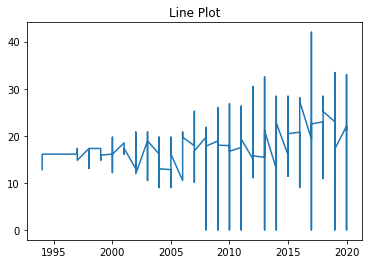

In [9]:
sellingpricemileage = usedcars[["year","mileage"]]
Y = sellingpricemileage.sort_values(by="year",ascending=True)
plt.title("Line Plot")
# Y.set_index("selling_price")
plt.plot(Y['year'],Y['mileage'])

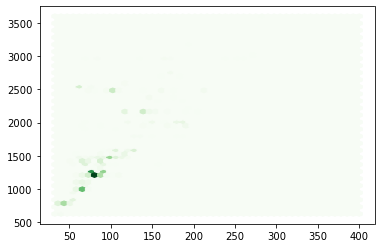

In [10]:
plt.hexbin(usedcars['max_power'],usedcars['engine'],gridsize = 50, cmap ='Greens')

{'whiskers': [<matplotlib.lines.Line2D at 0x23b181173a0>,
 'caps': [<matplotlib.lines.Line2D at 0x23b18117940>,
 'boxes': [<matplotlib.lines.Line2D at 0x23b181170d0>],
 'medians': [<matplotlib.lines.Line2D at 0x23b18117ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23b181221f0>],
 'means': []}

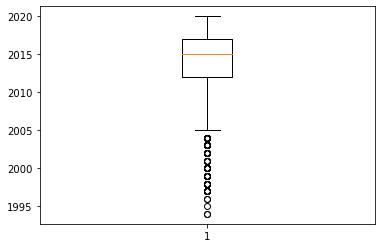

In [11]:
plt.boxplot(usedcars["year"])

In [12]:
usedcars["year"].describe()

count    7906.000000
mean     2013.983936
std         3.863695
min      1994.000000
25%      2012.000000
50%      2015.000000
75%      2017.000000
max      2020.000000
Name: year, dtype: float64

In [13]:
Sold = usedcars['sold'].value_counts()
NoAmt = Sold["N"]
YesAmt = Sold["Y"]
SoldTotal = usedcars['sold'].count()
NoPer = int(NoAmt/SoldTotal*100)/100
YesPer = int(YesAmt/SoldTotal*100)/100

In [14]:

c = (
    Liquid().add("% 2nd Hand Cars Not sold", [NoPer,YesPer])
    .set_global_opts(title_opts=opts.TitleOpts(title="Car sold Vs. not sold."))
)

c.render('./week7-4-pyechartsLiquid.html')

'C:\\Users\\Money\\Desktop\\DataVisualizationFinals\\week7-4-pyechartsLiquid.html'